<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%A1%D0%BE%D0%B7%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BC%D0%B0%D1%80%D0%BA%D0%B5%D1%80%D0%BE%D0%B2_ArUco_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_OpenCV_%D0%B8_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center;"><b>Создание маркеров ArUco с помощью OpenCV и Python</b></h1>

<h1 style = "text-align: center;"> <b> Generating ArUco markers with OpenCV and Python </b> </h1>

В этом уроке вы узнаете, как создавать маркеры ArUco с помощью OpenCV и Python.

In this tutorial, you will learn how to create ArUco markers using OpenCV and Python.

Маркеры ArUco - это двухмерные двоичные шаблоны, которые алгоритмы компьютерного зрения могут легко обнаружить.

ArUco markers are 2D binary patterns that computer vision algorithms can easily detect.

Обычно мы используем маркеры  ArUco для:

We usually use ArUco markers for:

* Калибровки камеры.  Camera calibration.
* Оценки размера объекта. Estimated object size.
* Измерения расстояния между камерой и объектом. Measure the distance between camera and object.
* 3D расположения. 3D layouts.
* Ориентации объекта. Object orientation.
* Робототехники и автономной навигации. Robotics and autonomous navigation.








### Загрузите zip-файл с кодом

### Download the code zip file

In [1]:
!wget http://dataudt.ru/datasets/cv/Lesson_4.Generating_ArUco_markers.zip
!unzip Lesson_4.Generating_ArUco_markers.zip

--2022-02-11 06:41:40--  http://dataudt.ru/datasets/cv/Lesson_4.Generating_ArUco_markers.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4383 (4.3K) [application/zip]
Saving to: ‘Lesson_4.Generating_ArUco_markers.zip’

Lesson_4.Generating 100%[===================>]   4.28K  --.-KB/s    in 0s      

2022-02-11 06:41:41 (472 MB/s) - ‘Lesson_4.Generating_ArUco_markers.zip’ saved [4383/4383]

Archive:  Lesson_4.Generating_ArUco_markers.zip
   creating: Lesson_4.Generating_ArUco_markers/opencv-generate-aruco/
  inflating: Lesson_4.Generating_ArUco_markers/opencv-generate-aruco/opencv_generate_aruco.py  
   creating: Lesson_4.Generating_ArUco_markers/opencv-generate-aruco/tags/
  inflating: Lesson_4.Generating_ArUco_markers/opencv-generate-aruco/tags/DICT_5X5_100_id24.png  
  inflating: Lesson_4.Generating_ArUco_markers/opencv-generate-aruco/tags/DICT_5X5_100_

### Импорт пакетов

### Import Packages

In [2]:
# импортируем необходимые библиотеки
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import sys

### Функция для отображения изображений в Jupyter Notebooks и Google Colab

### Function to display images in Jupyter Notebooks and Google Colab

In [3]:
def plt_imshow(title, image):
    # конвертируем изображение из формата BGR в RGB и отображаем его 
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Реализация нашего скрипта генерации маркеров ArUco с OpenCV и Python

### Implementing our ArUco marker generation script with OpenCV and Python

In [4]:
# указываем аргументы и значения
# возьмем номер словаря и его тип
# specify arguments and values
# take the dictionary number and its type
args = {
	"output": "tags/DICT_5X5_100_id24.png",
    "id": 29,
    "type": "DICT_ARUCO_ORIGINAL",
}

In [5]:
# определяем имена для каждого возможного тега ArUco, поддерживаемого OpenCV
# define names of each possible ArUco tag OpenCV supports
ARUCO_DICT = {
	"DICT_4X4_50": cv2.aruco.DICT_4X4_50,
	"DICT_4X4_100": cv2.aruco.DICT_4X4_100,
	"DICT_4X4_250": cv2.aruco.DICT_4X4_250,
	"DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
	"DICT_5X5_50": cv2.aruco.DICT_5X5_50,
	"DICT_5X5_100": cv2.aruco.DICT_5X5_100,
	"DICT_5X5_250": cv2.aruco.DICT_5X5_250,
	"DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
	"DICT_6X6_50": cv2.aruco.DICT_6X6_50,
	"DICT_6X6_100": cv2.aruco.DICT_6X6_100,
	"DICT_6X6_250": cv2.aruco.DICT_6X6_250,
	"DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
	"DICT_7X7_50": cv2.aruco.DICT_7X7_50,
	"DICT_7X7_100": cv2.aruco.DICT_7X7_100,
	"DICT_7X7_250": cv2.aruco.DICT_7X7_250,
	"DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
	"DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL,
	"DICT_APRILTAG_16h5": cv2.aruco.DICT_APRILTAG_16h5,
	"DICT_APRILTAG_25h9": cv2.aruco.DICT_APRILTAG_25h9,
	"DICT_APRILTAG_36h10": cv2.aruco.DICT_APRILTAG_36h10,
	"DICT_APRILTAG_36h11": cv2.aruco.DICT_APRILTAG_36h11
}

In [6]:
# проверяем, что предоставленный тег ArUCo существует и поддерживается OpenCV
# verify that the supplied ArUCo tag exists and is supported by
# OpenCV
if ARUCO_DICT.get(args["type"], None) is None:
	print("[INFO] ArUCo tag of '{}' is not supported".format(
		args["type"]))
	sys.exit(0)

# загружаем словарь ArUCo
# load the ArUCo dictionary
arucoDict = cv2.aruco.Dictionary_get(ARUCO_DICT[args["type"]])

[INFO] generating ArUCo tag type 'DICT_ARUCO_ORIGINAL' with ID '29'


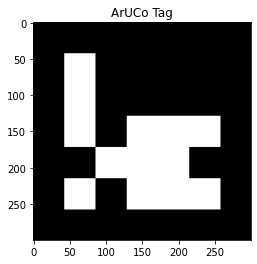

In [7]:
# выделяем память для выходного тега ArUCo
# затем рисуем тег ArUCo на выходном изображении
# allocate memory for the output ArUCo tag and then draw the ArUCo
# tag on the output image
print("[INFO] generating ArUCo tag type '{}' with ID '{}'".format(
	args["type"], args["id"]))
tag = np.zeros((300, 300, 1), dtype="uint8")
cv2.aruco.drawMarker(arucoDict, args["id"], 300, tag, 1)

# записываем сгенерированный тег ArUCo на диск и затем выводим его на экран
# write the generated ArUCo tag to disk and then display it to our
# screen
cv2.imwrite(args["output"], tag)
plt_imshow("ArUCo Tag", tag)